In [1]:
# The explaining document contains the assumptions and processes. 
# This code is initializing the model creation. 
# I've checked some exapmles 
# [https://matheusfacure.github.io/python-causality-handbook/11-Propensity-Score.html]
# [https://www.kaggle.com/code/canorhanakpinar/propensity-score-matching-in-python/edit]
# and sometimes using ChatGPT code which message log is (or will be) in the appendix. 


## Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import LogisticRegression
import statsmodels.tools.tools 
import statsmodels.formula.api as smf
from causalinference import CausalModel





# # Intro

# ## Import Data & Check Missing Values

# ... psm_dataset = pd.read_csv(....)
# psm_dataset.info()
# psm_dataset.describe()

# ### Attain variables
# note that, population size accounts to a threshold that can directly alter the treatment status.

# X_full = data["x1", "x2", ... "xn"]


# So for the training purposes, I import the Heart Data which I used in a bootcamp project.

psm_dataset = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
print(psm_dataset.info())
print(psm_dataset.describe())

psm_dataset= statsmodels.tools.tools.add_constant(psm_dataset)
X_full = psm_dataset.drop(columns="HeartDiseaseorAttack")


feature_list = X_full.columns.values.tolist()
Y = psm_dataset.drop(columns = feature_list)

print(X_full,Y)

print(feature_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Optimization terminated successfully.
         Current function value: 0.238193
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.238193
         Iterations 9
                            Logit Regression Results                            
Dep. Variable:     HeartDiseaseorAttack   No. Observations:               253680
Model:                            Logit   Df Residuals:                   253632
Method:                             MLE   Df Model:                           47
Date:                  Sun, 25 Feb 2024   Pseudo R-squ.:                  0.2368
Time:                          19:14:26   Log-Likelihood:                -60425.
converged:                         True   LL-Null:                       -79178.
Covariance Type:              nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

<Axes: xlabel='prob', ylabel='Count'>

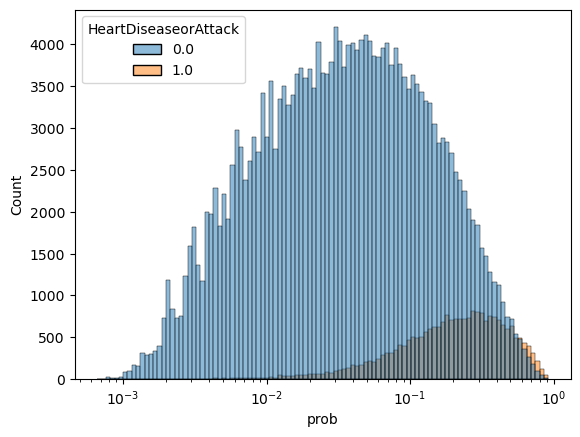

In [2]:
# Fit Logit

logit1 = smf.logit("HeartDiseaseorAttack  ~ const + C(HighBP) + C(HighChol) + C(CholCheck) + np.log(BMI) + C(Smoker) + C(Stroke) + C(Diabetes) + C(PhysActivity) + C(Fruits) + C(Veggies) + C(HvyAlcoholConsump)  + C(AnyHealthcare) + C(NoDocbcCost) + C(GenHlth)  + MentHlth + PhysHlth + C(DiffWalk) + C(Sex) + C(Age) + C(Education) + C(Income)", data=psm_dataset, hasconst=True).fit()

logit2 = smf.logit("HeartDiseaseorAttack  ~ const + C(HighBP) + C(HighChol) + C(CholCheck) + BMI + C(Smoker) + C(Stroke) + C(Diabetes) + C(PhysActivity) + C(Fruits) + C(Veggies) + C(HvyAlcoholConsump)  + C(AnyHealthcare) + C(NoDocbcCost) + C(GenHlth)  + MentHlth + PhysHlth + C(DiffWalk) + C(Sex) + C(Age) + C(Education) + C(Income)", data=psm_dataset, hasconst =True).fit()

print(logit1.summary())

print(logit2.summary())

logit1_score = pd.DataFrame({'prob':logit1.predict()})
logit1_score['pred_label'] = (logit1_score['prob']>0.5).astype(int)
logit1_score["HeartDiseaseorAttack"] = psm_dataset["HeartDiseaseorAttack"]

logit2_score = pd.DataFrame({'prob':logit2.predict()})
logit2_score['pred_label'] = (logit2_score['prob']>0.5).astype(int)
logit2_score["HeartDiseaseorAttack"] = psm_dataset["HeartDiseaseorAttack"]

print(logit1_score, logit2_score)


sns.histplot(data=logit1_score, x='prob', hue="HeartDiseaseorAttack", log_scale = True)  


c:\Users\omen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


               column     coeff
0               const -3.919739
1              HighBP  0.523764
2            HighChol  0.610358
3           CholCheck  0.510700
4                 BMI  0.000858
5              Smoker  0.362763
6              Stroke  0.979068
7            Diabetes  0.146695
8        PhysActivity  0.038730
9              Fruits  0.005549
10            Veggies  0.041933
11  HvyAlcoholConsump -0.292444
12      AnyHealthcare -0.010637
13        NoDocbcCost  0.254717
14            GenHlth  0.490119
15           MentHlth  0.002436
16           PhysHlth  0.001085
17           DiffWalk  0.292960
18                Sex  0.760305
19                Age  0.255318
20          Education  0.010150
21             Income -0.043142
the binary prediction is: 0.0
the corresponding probabilities are: [0.68840341 0.31159659]
    const  HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0     1.0                   0.0     1.0       1.0        1.0  40.0     1.0   
1     1.0        

<Axes: xlabel='ps', ylabel='Count'>

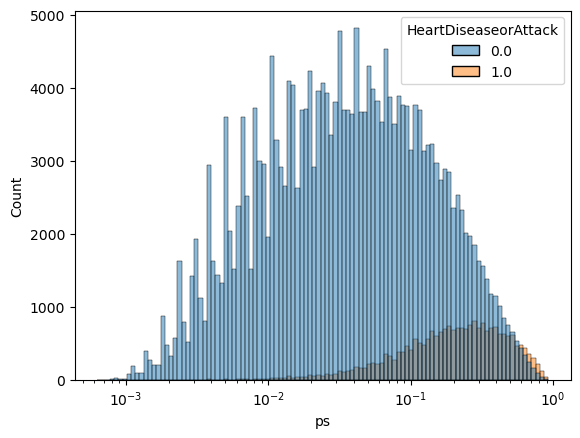

In [3]:
lr = LogisticRegression(max_iter=7000)
lr.fit(X_full, Y)

coeffs = pd.DataFrame({
    'column':X_full.columns.to_numpy(),
    'coeff':lr.coef_.ravel(),
})
print(coeffs)

pred_binary = lr.predict(X_full)  # binary 0 control, 1, treatment
pred_prob = lr.predict_proba(X_full)  # probabilities for classes

print('the binary prediction is:', pred_binary[0])
print('the corresponding probabilities are:', pred_prob[0])

psm_dataset['ps'] = pred_prob[:, 1]

def logit(p):
    logit_value = math.log(p / (1-p))
    return logit_value

psm_dataset['ps_logit'] = psm_dataset.ps.apply(lambda x: logit(x))

print(psm_dataset[:20])


# check the overlap of ps for control and treatment using histogram
# if not much overlap, the matching won't work
sns.histplot(data=psm_dataset, x='ps', hue="HeartDiseaseorAttack", log_scale = True)  